In [1]:
# Imports and Directory Setup

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Define base directory for the project
project_dir = r"C:\Users\matth\OneDrive\Documents\data_science_project\premier-league-home-advantage"

# Define the directory where the processed (cleaned) data is stored
processed_data_dir = os.path.join(project_dir, "data", "processed_data")

# Define the path to the combined match data file
match_data_file = os.path.join(processed_data_dir, "all_seasons_match_data.csv")

# Define the directory paths for saving outputs
output_dir = os.path.join(project_dir, "output")
figures_dir = os.path.join(output_dir, "figures")
tables_dir = os.path.join(output_dir, "tables")

print("Required libraries imported.")
print(f"Processed data directory: {processed_data_dir}")
print(f"Match data file path: {match_data_file}")
print(f"Figures output directory: {figures_dir}")
print(f"Tables output directory: {tables_dir}")

# Set a default style for plots
sns.set_theme(style="whitegrid")

Required libraries imported.
Processed data directory: C:\Users\matth\OneDrive\Documents\data_science_project\premier-league-home-advantage\data\processed_data
Match data file path: C:\Users\matth\OneDrive\Documents\data_science_project\premier-league-home-advantage\data\processed_data\all_seasons_match_data.csv
Figures output directory: C:\Users\matth\OneDrive\Documents\data_science_project\premier-league-home-advantage\output\figures
Tables output directory: C:\Users\matth\OneDrive\Documents\data_science_project\premier-league-home-advantage\output\tables


In [2]:
# Load Match Data

print(f"\nLoading match data from: {match_data_file}")
try:
    match_df = pd.read_csv(match_data_file, encoding='utf-8')
    print(f" Successfully loaded match data. Shape: {match_df.shape}")
except FileNotFoundError:
    print(f"Error: File not found at {match_data_file}.")
    print(" Please ensure the file exists in the processed_data directory.")
    match_df = None
except Exception as e:
    print(f"An error occurred loading the match data: {e}")
    match_df = None


Loading match data from: C:\Users\matth\OneDrive\Documents\data_science_project\premier-league-home-advantage\data\processed_data\all_seasons_match_data.csv
 Successfully loaded match data. Shape: (2280, 12)


In [5]:
# Initial Data Inspection

# Check if data loaded successfully before inspecting
if match_df is not None:
    print("\n--- First 5 Rows (Head) ---")
    display(match_df.head())

    print("\n--- DataFrame Info ---")
    # Simply call .info() - Jupyter will display its output
    match_df.info()

    print("\n--- Summary Statistics ---")
    # Include 'all' to get stats for object/category columns too
    display(match_df.describe(include='all'))

else:
    print("\nCannot perform inspection because match data failed to load.")


--- First 5 Rows (Head) ---


,dayofweek,date,start_time,home_team,home_xg,score,away_xg,away_team,attendance,venue,referee,season
0,Fri,2018-08-10,20:00,Manchester Utd,1.5,Score: 2 - 1,1.8,Leicester City,74439.0,Old Trafford,Andre Marriner,2018-2019
1,Sat,2018-08-11,12:30,Newcastle Utd,1.0,Score: 1 - 2,2.0,Tottenham,51749.0,St. James' Park,Martin Atkinson,2018-2019
2,Sat,2018-08-11,15:00,Fulham,0.7,Score: 0 - 2,1.0,Crystal Palace,24821.0,Craven Cottage,Mike Dean,2018-2019
3,Sat,2018-08-11,15:00,Bournemouth,2.2,Score: 2 - 0,1.4,Cardiff City,10353.0,Vitality Stadium,Kevin Friend,2018-2019
4,Sat,2018-08-11,15:00,Huddersfield,0.3,Score: 0 - 3,1.9,Chelsea,24121.0,The John Smith's Stadium,Chris Kavanagh,2018-2019



--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dayofweek   2280 non-null   object 
 1   date        2280 non-null   object 
 2   start_time  2280 non-null   object 
 3   home_team   2280 non-null   object 
 4   home_xg     2280 non-null   float64
 5   score       2280 non-null   object 
 6   away_xg     2280 non-null   float64
 7   away_team   2280 non-null   object 
 8   attendance  2280 non-null   float64
 9   venue       2280 non-null   object 
 10  referee     2280 non-null   object 
 11  season      2280 non-null   object 
dtypes: float64(3), object(9)
memory usage: 213.9+ KB

--- Summary Statistics ---


,dayofweek,date,start_time,home_team,home_xg,score,away_xg,away_team,attendance,venue,referee,season
count,2280,2280,2280,2280,2280.000000,2280,2280.000000,2280,2280.000000,2280,2280,2280
unique,7,718,24,28,NaN,46,NaN,28,NaN,31,37,6
top,Sat,2024-05-19,15:00,Manchester Utd,NaN,Score: 1 - 1,NaN,Wolves,NaN,Old Trafford,Anthony Taylor,2018-2019
freq,1065,10,712,114,NaN,239,NaN,114,NaN,114,177,380
mean,NaN,NaN,NaN,NaN,1.518333,NaN,1.254167,NaN,31118.999123,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.855207,NaN,0.761324,NaN,21580.506976,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,0.900000,NaN,0.700000,NaN,16876.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.400000,NaN,1.100000,NaN,31062.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2.100000,NaN,1.700000,NaN,52123.250000,NaN,NaN,NaN


In [8]:
# Feature Engineering from Score

# Check if match_df exists
if 'match_df' in locals() and match_df is not None:
    print("\nPerforming feature engineering (Goals, Difference, Points)...")

    # Make a copy to avoid SettingWithCopyWarning
    match_df = match_df.copy()

    # Check if 'score' column exists
    if 'score' in match_df.columns:
        try:
            # Extract Home and Away Goals
            # Expected format: "Score: H - A"
            split_scores = match_df['score'].str.split(': ', expand=True)[1].str.split(' - ', expand=True)
            # Convert to numeric, coercing errors to NaN
            match_df['home_goals'] = pd.to_numeric(split_scores[0].str.strip(), errors='coerce')
            match_df['away_goals'] = pd.to_numeric(split_scores[1].str.strip(), errors='coerce')

            # Check for parsing errors (NaNs) - only if needed for debugging
            if match_df['home_goals'].isnull().any() or match_df['away_goals'].isnull().any():
                 print("Warning: Some scores may not have been parsed correctly (resulting in NaN goals).")

            # Calculate Goal Difference
            match_df['goal_difference'] = match_df['home_goals'] - match_df['away_goals']

            # Calculate Home Points
            conditions = [
                match_df['home_goals'] > match_df['away_goals'], # Home Win
                match_df['home_goals'] == match_df['away_goals'], # Draw
                match_df['home_goals'] < match_df['away_goals'] # Home Loss
            ]
            point_values = [3, 1, 0]
            match_df['home_points'] = np.select(conditions, point_values, default=np.nan)

            print("Feature engineering complete.")

            # Verification
            print("\n--- Verification of new columns (first 5 rows) ---")
            display(match_df[['score', 'home_goals', 'away_goals', 'goal_difference', 'home_points']].head())

        except Exception as e:
            print(f"Error during feature engineering: {e}")
            # Ensure columns exist as NaN if error occurs
            if 'home_goals' not in match_df.columns: match_df['home_goals'] = np.nan
            if 'away_goals' not in match_df.columns: match_df['away_goals'] = np.nan
            if 'goal_difference' not in match_df.columns: match_df['goal_difference'] = np.nan
            if 'home_points' not in match_df.columns: match_df['home_points'] = np.nan

    else:
        print("Error: 'score' column not found in DataFrame.")

else:
    print("\nSkipping feature engineering because match_df DataFrame not available.")


Performing feature engineering (Goals, Difference, Points)...
Feature engineering complete.

--- Verification of new columns (first 5 rows) ---


,score,home_goals,away_goals,goal_difference,home_points
0,Score: 2 - 1,2,1,1,3.0
1,Score: 1 - 2,1,2,-1,0.0
2,Score: 0 - 2,0,2,-2,0.0
3,Score: 2 - 0,2,0,2,3.0
4,Score: 0 - 3,0,3,-3,0.0


In [9]:
# Define Analysis Periods ('COVID-Affected' vs 'Normal')

# Check if match_df exists
if 'match_df' in locals() and match_df is not None:
    print("\nDefining analysis periods based on attendance...")
    print(" Confirmed no missing values in 'attendance' column.")

    # Define the threshold based on user information
    attendance_threshold = 10000
    print(f" Using attendance threshold: < {attendance_threshold} for 'COVID-Affected'.")

    # Create the 'period' column using np.where
    match_df['period'] = np.where(match_df['attendance'] < attendance_threshold, 'COVID-Affected', 'Normal')

    print(" Created 'period' column.")

    # Verification
    print("\n--- Value Counts for 'period' column ---")
    print(match_df['period'].value_counts())

else:
    print("\nSkipping period definition because match_df DataFrame not available.")


Defining analysis periods based on attendance...
 Confirmed no missing values in 'attendance' column.
 Using attendance threshold: < 10000 for 'COVID-Affected'.
 Created 'period' column.

--- Value Counts for 'period' column ---
Normal            1812
COVID-Affected     468
Name: period, dtype: int64


In [10]:
# Compare Home Advantage Metrics Across Periods

# Check if match_df exists and has the required columns
if 'match_df' in locals() and match_df is not None and 'period' in match_df.columns and 'goal_difference' in match_df.columns and 'home_points' in match_df.columns:
    print("\nCalculating average home advantage metrics per period...")

    # Group by the 'period' column and calculate the mean for relevant metrics
    period_comparison = match_df.groupby('period')[[
        'goal_difference',
        'home_points'
    ]].mean().reset_index()

    print("\n--- Comparison of Average Metrics ('COVID-Affected' vs 'Normal') ---")
    # Display the resulting comparison table
    display(period_comparison)
    print("-" * 60)

else:
    print("\nSkipping comparison because match_df or required columns ('period', 'goal_difference', 'home_points') not available.")
    print(" Ensure the previous cells creating these have been run successfully.")


Calculating average home advantage metrics per period...

--- Comparison of Average Metrics ('COVID-Affected' vs 'Normal') ---


,period,goal_difference,home_points
0,COVID-Affected,0.057692,1.397436
1,Normal,0.316777,1.603753


------------------------------------------------------------



Generating bar charts comparing metrics across periods...
 Comparison plots saved successfully to: C:\Users\matth\OneDrive\Documents\data_science_project\premier-league-home-advantage\output\figures\period_comparison_bar_charts.png


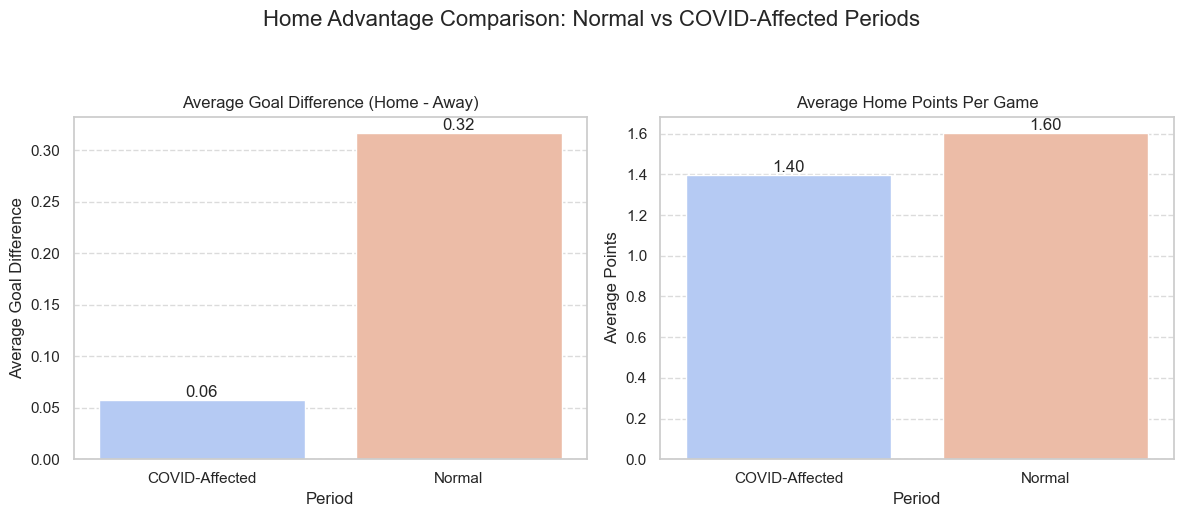

In [11]:
# Visualise Home Advantage Metrics Across Periods

# Check if the period_comparison DataFrame exists from the previous cell
if 'period_comparison' in locals() and period_comparison is not None:
    print("\nGenerating bar charts comparing metrics across periods...")

    # Create Figure with Two Subplots
    # Create a figure and a set of subplots (1 row, 2 columns)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5)) # Adjust figsize as needed
    fig.suptitle('Home Advantage Comparison: Normal vs COVID-Affected Periods', fontsize=16, y=1.03)

    # Plot 1: Average Goal Difference
    sns.barplot(ax=axes[0], x='period', y='goal_difference', data=period_comparison, palette='coolwarm')
    axes[0].set_title('Average Goal Difference (Home - Away)')
    axes[0].set_xlabel('Period')
    axes[0].set_ylabel('Average Goal Difference')
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)
    # Add exact values on bars
    for container in axes[0].containers:
        axes[0].bar_label(container, fmt='%.2f')


    # Plot 2: Average Home Points
    sns.barplot(ax=axes[1], x='period', y='home_points', data=period_comparison, palette='coolwarm')
    axes[1].set_title('Average Home Points Per Game')
    axes[1].set_xlabel('Period')
    axes[1].set_ylabel('Average Points')
    axes[1].grid(axis='y', linestyle='--', alpha=0.7)
    # Add exact values on bars
    for container in axes[1].containers:
        axes[1].bar_label(container, fmt='%.2f')


    # Final Touches & Saving
    plt.tight_layout(rect=[0, 0, 1, 0.97]) # Adjust layout to prevent overlap

    # Define filename and save
    plot_filename_period_comp = os.path.join(figures_dir, 'period_comparison_bar_charts.png')
    try:
        plt.savefig(plot_filename_period_comp, bbox_inches='tight', dpi=300)
        print(f" Comparison plots saved successfully to: {plot_filename_period_comp}")
    except Exception as e:
        print(f" An error occurred while saving the comparison plots: {e}")

    # Display the plot
    plt.show()

else:
    print("\nSkipping visualisation because period_comparison DataFrame not available.")
    print(" Ensure the previous cell calculating this has been run successfully.")

In [12]:
# Regression Analysis: Attendance Impact on Goal Difference

# Import the statsmodels formula API
import statsmodels.formula.api as smf

# Check if match_df exists and has the required columns
if 'match_df' in locals() and match_df is not None and 'period' in match_df.columns and 'goal_difference' in match_df.columns and 'attendance' in match_df.columns:
    print("\nSetting up regression analysis (goal_difference ~ attendance)...")

    # Filter out the 'COVID-Affected' period
    regression_df = match_df[match_df['period'] == 'Normal'].copy()
    print(f" Using {len(regression_df)} matches from the 'Normal' period for regression.")

    if len(regression_df) > 0:
        # Define and Fit the OLS Model
        formula = 'goal_difference ~ attendance'
        print(f" Fitting OLS model with formula: {formula}")

        try:
            model = smf.ols(formula=formula, data=regression_df)
            results = model.fit()

            # Display Regression Results
            print("\n--- OLS Regression Results ---")
            print(results.summary())
            print("-" * 80)

        except Exception as e:
            print(f"An error occurred during model fitting or summary generation: {e}")
    else:
        print("Skipping regression: No data available after filtering for 'Normal' period.")

else:
    print("\nSkipping regression because match_df or required columns not available.")
    print(" Ensure the previous cells creating these have been run successfully.")


Setting up regression analysis (goal_difference ~ attendance)...
 Using 1812 matches from the 'Normal' period for regression.
 Fitting OLS model with formula: goal_difference ~ attendance

--- OLS Regression Results ---
                            OLS Regression Results                            
Dep. Variable:        goal_difference   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     110.2
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           4.58e-25
Time:                        15:04:48   Log-Likelihood:                -3734.2
No. Observations:                1812   AIC:                             7472.
Df Residuals:                    1810   BIC:                             7483.
Df Model:                           1                                         
Covariance Type:            nonrobust                               

In [13]:
# Advanced Regression Prep: Calculate Team Strength Proxies

print("\nLoading seasonal data to calculate team strength proxies...")

# Define the path to the seasonal data file
seasonal_data_file = os.path.join(processed_data_dir, "all_seasons_team_data.csv")

# Load the seasonal team stats data
try:
    seasonal_df = pd.read_csv(seasonal_data_file, encoding='utf-8')
    print(f" Successfully loaded seasonal stats data from: {seasonal_data_file}")
except FileNotFoundError:
    print(f"Error: File not found at {seasonal_data_file}.")
    print(" This file is required to create team strength proxies.")
    seasonal_df = None
except Exception as e:
    print(f"An error occurred loading the seasonal stats data: {e}")
    seasonal_df = None

# Proceed only if seasonal data loaded successfully
if seasonal_df is not None:
    print("\nSelecting and renaming columns for strength proxies...")
    # Select the necessary columns: team, season, and the xG difference metrics
    # Use home_xg_diff_per90 as a proxy for team strength when playing at home that season
    # Use away_xg_diff_per90 as a proxy for team strength when playing away that season
    try:
        team_strength_proxies = seasonal_df[[
            'team',
            'season',
            'home_xg_diff_per90',
            'away_xg_diff_per90'
        ]].copy() # Use .copy() to avoid SettingWithCopyWarning when renaming

        # Rename columns for clarity when merging later
        team_strength_proxies.rename(columns={
            'home_xg_diff_per90': 'home_strength_proxy',
            'away_xg_diff_per90': 'away_strength_proxy'
        }, inplace=True)

        print(" Created team strength proxy DataFrame.")

        # Verification
        print("\n--- Team Strength Proxies DataFrame Info ---")
        team_strength_proxies.info()
        print("\n--- Team Strength Proxies DataFrame Head ---")
        display(team_strength_proxies.head())

    except KeyError as e:
        print(f"Error: A required column ({e}) was not found in {seasonal_data_file}.")
        print(" Cannot create strength proxies.")
        team_strength_proxies = None
    except Exception as e:
        print(f"An error occurred selecting/renaming columns: {e}")
        team_strength_proxies = None

else:
    print("\nSkipping strength proxy creation because seasonal data failed to load.")


Loading seasonal data to calculate team strength proxies...
 Successfully loaded seasonal stats data from: C:\Users\matth\OneDrive\Documents\data_science_project\premier-league-home-advantage\data\processed_data\all_seasons_team_data.csv

Selecting and renaming columns for strength proxies...
 Created team strength proxy DataFrame.

--- Team Strength Proxies DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 120 non-null    object 
 1   season               120 non-null    object 
 2   home_strength_proxy  120 non-null    float64
 3   away_strength_proxy  120 non-null    float64
dtypes: float64(2), object(2)
memory usage: 3.9+ KB

--- Team Strength Proxies DataFrame Head ---


,team,season,home_strength_proxy,away_strength_proxy
0,Manchester City,2018-2019,1.93,1.21
1,Liverpool,2018-2019,1.52,0.84
2,Chelsea,2018-2019,0.87,0.29
3,Tottenham,2018-2019,0.36,0.04
4,Arsenal,2018-2019,0.58,-0.27


In [15]:
# Advanced Regression Prep: Merge Home Team Strength

# Check if prerequisite DataFrames exist and have necessary columns
if ('match_df' in locals() and match_df is not None and
    'team_strength_proxies' in locals() and team_strength_proxies is not None and
    'season' in match_df.columns and 'home_team' in match_df.columns and
    'team' in team_strength_proxies.columns and 'home_strength_proxy' in team_strength_proxies.columns):

    print("\nMerging home team strength proxy...")
    match_df_merged_home = match_df.copy() # Start with a copy

    # Merge based on home_team and season
    match_df_merged_home = pd.merge(
        match_df_merged_home,
        team_strength_proxies[['team', 'season', 'home_strength_proxy']], # Select only needed proxy
        how='left',
        left_on=['home_team', 'season'],
        right_on=['team', 'season']
    )
    # Rename merged column and drop redundant 'team' column from merge
    match_df_merged_home.rename(columns={'home_strength_proxy': 'home_team_strength_proxy'}, inplace=True)
    match_df_merged_home.drop(columns=['team'], inplace=True)

    # Check for NaNs introduced by the merge
    home_nans = match_df_merged_home['home_team_strength_proxy'].isnull().sum()
    if home_nans > 0:
        print(f"Warning: Found {home_nans} rows with missing home strength proxy after merge.")
    else:
        print(" Home team merge complete (no NaNs found).")

else:
    print("\nSkipping home merge due to missing prerequisites.")
    match_df_merged_home = None # Ensure variable exists but is None


Merging home team strength proxy...
 Home team merge complete (no NaNs found).


In [16]:
# Advanced Regression Prep: Merge Away Team Strength

# Check if the result from the previous merge step exists and prerequisites are met
if ('match_df_merged_home' in locals() and match_df_merged_home is not None and
    'team_strength_proxies' in locals() and team_strength_proxies is not None and
    'season' in match_df_merged_home.columns and 'away_team' in match_df_merged_home.columns and
    'team' in team_strength_proxies.columns and 'away_strength_proxy' in team_strength_proxies.columns):

    print("\nMerging away team strength proxy...")
    # Continue working with the result of the previous merge
    match_df_merged = match_df_merged_home.copy() # Rename for final merged df

    # Merge based on away_team and season
    match_df_merged = pd.merge(
        match_df_merged,
        team_strength_proxies[['team', 'season', 'away_strength_proxy']], # Select only needed proxy
        how='left',
        left_on=['away_team', 'season'],
        right_on=['team', 'season']
    )
    # Rename merged column and drop redundant 'team' column from merge
    match_df_merged.rename(columns={'away_strength_proxy': 'away_team_strength_proxy'}, inplace=True)
    match_df_merged.drop(columns=['team'], inplace=True)

    # Check for NaNs introduced by the merge
    away_nans = match_df_merged['away_team_strength_proxy'].isnull().sum()
    if away_nans > 0:
        print(f"Warning: Found {away_nans} rows with missing away strength proxy after merge.")
    else:
        print(" Away team merge complete (no NaNs found).")

else:
    print("\nSkipping away merge because prerequisite DataFrame from home merge is not available.")
    match_df_merged = None # Ensure variable exists but is None


Merging away team strength proxy...
 Away team merge complete (no NaNs found).


In [18]:
# Advanced Regression Analysis: Attendance + Team Strength Impact

# Check if necessary prerequisites exist
if ('match_df_merged' in locals() and match_df_merged is not None and
    'period' in match_df_merged.columns and
    'goal_difference' in match_df_merged.columns and
    'attendance' in match_df_merged.columns and
    'home_team_strength_proxy' in match_df_merged.columns and
    'away_team_strength_proxy' in match_df_merged.columns):

    print("\nSetting up advanced regression analysis (controlling for team strength)...")

    # Filter Data
    regression_df_adv = match_df_merged[match_df_merged['period'] == 'Normal'].copy()
    print(f" Using {len(regression_df_adv)} matches initially from the 'Normal' period.")

    # Handle NaNs in Regression Columns
    regression_cols_adv = ['goal_difference', 'attendance', 'home_team_strength_proxy', 'away_team_strength_proxy']
    rows_before_drop = len(regression_df_adv)
    regression_df_adv.dropna(subset=regression_cols_adv, inplace=True) # Keep this NaN drop
    rows_after_drop = len(regression_df_adv)
    if rows_before_drop != rows_after_drop:
        print(f" Dropped {rows_before_drop - rows_after_drop} rows due to NaNs in required regression columns.")
    else:
        print(" No rows dropped due to NaNs.")

    # Define and Fit the OLS Model
    formula_adv = 'goal_difference ~ attendance + home_team_strength_proxy + away_team_strength_proxy'
    print(f"\nFitting OLS model with formula: {formula_adv}")

    try:
        model_adv = smf.ols(formula=formula_adv, data=regression_df_adv)
        results_adv = model_adv.fit()

        # Display Regression Results
        print("\n--- OLS Regression Results (Advanced Model) ---")
        print(results_adv.summary())
        print("-" * 80)

    except NameError as e:
         print(f"Error during model fitting: {e}")
    except Exception as e:
        print(f"An error occurred during model fitting or summary generation: {e}")


else:
    print("\nSkipping advanced regression because merged DataFrame or required columns not available.")
    print(" Ensure the previous cells preparing 'match_df_merged' have run successfully.")


Setting up advanced regression analysis (controlling for team strength)...
 Using 1812 matches initially from the 'Normal' period.
 No rows dropped due to NaNs.

Fitting OLS model with formula: goal_difference ~ attendance + home_team_strength_proxy + away_team_strength_proxy

--- OLS Regression Results (Advanced Model) ---
                            OLS Regression Results                            
Dep. Variable:        goal_difference   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     236.2
Date:                Sat, 19 Apr 2025   Prob (F-statistic):          2.71e-129
Time:                        15:37:44   Log-Likelihood:                -3488.2
No. Observations:                1812   AIC:                             6984.
Df Residuals:                    1808   BIC:                             7006.
Df Model:                           3    


Generating binned scatter plot with regression line...
Binned regression plot saved successfully to: C:\Users\matth\OneDrive\Documents\data_science_project\premier-league-home-advantage\output\figures\attendance_vs_goaldiff_binned_regplot.png


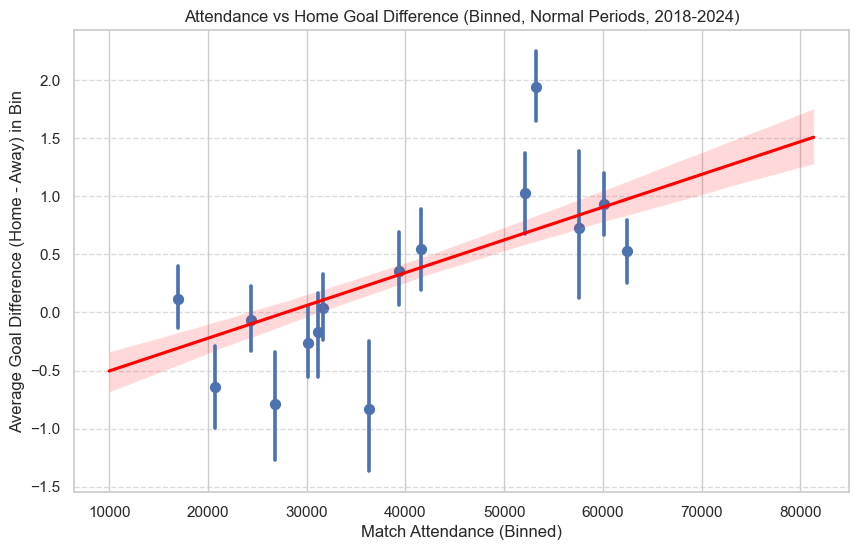

In [24]:
# Visualise Simple Regression Relationship (Binned Scatter Plot)

# Check if match_df exists and has the required columns
if ('match_df' in locals() and match_df is not None and
    'period' in match_df.columns and
    'goal_difference' in match_df.columns and
    'attendance' in match_df.columns):

    # Prepare Data (using the same subset as the simple regression model)
    simple_reg_df = match_df[match_df['period'] == 'Normal'].copy()

    # Ensure required columns are numeric and drop NaNs
    simple_reg_df['attendance'] = pd.to_numeric(simple_reg_df['attendance'], errors='coerce')
    simple_reg_df['goal_difference'] = pd.to_numeric(simple_reg_df['goal_difference'], errors='coerce')
    simple_reg_df.dropna(subset=['attendance', 'goal_difference'], inplace=True)

    if len(simple_reg_df) > 0:
        # Create Binned Scatter Plot with Regression Line
        print("\nGenerating binned scatter plot with regression line...")
        plt.figure(figsize=(10, 6))

        # Use seaborn.regplot with x_bins
        num_bins = 15
        sns.regplot(x='attendance', y='goal_difference', data=simple_reg_df,
                    x_bins=num_bins,
                    line_kws={'color':'red'}) # Make regression line red

        # Add Titles and Labels
        plt.title(f'Attendance vs Home Goal Difference (Binned, Normal Periods, 2018-2024)')
        plt.xlabel('Match Attendance (Binned)')
        plt.ylabel('Average Goal Difference (Home - Away) in Bin')
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        # Define Filename and Save
        plot_filename_binned_reg = os.path.join(figures_dir, 'attendance_vs_goaldiff_binned_regplot.png')
        try:
            plt.savefig(plot_filename_binned_reg, bbox_inches='tight', dpi=300)
            print(f"Binned regression plot saved successfully to: {plot_filename_binned_reg}")
        except Exception as e:
            print(f"An error occurred while saving the binned regression plot: {e}")

        # Display the plot
        plt.show()

    else:
        print("Skipping visualisation: No data available after filtering/cleaning for simple regression.")

else:
    print("\nSkipping binned regression visualisation because match_df or required columns not available.")

In [25]:
# Time/Day Effects Prep: Process Start Time

# Check if prerequisite DataFrame exists
if 'match_df_merged' in locals() and match_df_merged is not None:
    print("\nProcessing 'start_time' to create time categories...")

    if 'start_time' in match_df_merged.columns:
        try:
            # Convert 'start_time' to datetime objects
            times = pd.to_datetime(match_df_merged['start_time'], format='%H:%M', errors='coerce')
            # Extract the hour
            match_df_merged['kick_off_hour'] = times.dt.hour

            # Handle potential parsing errors
            if match_df_merged['kick_off_hour'].isnull().any():
                print(f"Warning: Could not parse start time for {match_df_merged['kick_off_hour'].isnull().sum()} rows.")

            # Define time categories based on kick-off hour
            conditions = [
                match_df_merged['kick_off_hour'] < 13,                      # Early (Before 1 PM)
                (match_df_merged['kick_off_hour'] >= 13) & (match_df_merged['kick_off_hour'] <= 17), # Midday (1 PM - 5 PM)
                match_df_merged['kick_off_hour'] > 17                       # Late (After 5 PM)
            ]
            categories = ['Early', 'Midday', 'Late']
            # Assign categories, default to 'Unknown' if hour is NaN
            match_df_merged['time_category'] = np.select(conditions, categories, default='Unknown')
            print(" Created 'time_category' column.")

            # Verification for this step
            print("\n--- Value Counts for 'time_category':")
            print(match_df_merged['time_category'].value_counts(dropna=False))
            print("\n--- Head showing 'start_time', 'kick_off_hour', 'time_category':")
            display(match_df_merged[['start_time', 'kick_off_hour', 'time_category']].head())

        except Exception as e:
            print(f" Error processing 'start_time': {e}")
            if 'time_category' not in match_df_merged.columns: match_df_merged['time_category'] = 'Error'
    else:
        print(" 'start_time' column not found. Cannot create time categories.")
        if 'time_category' not in match_df_merged.columns: match_df_merged['time_category'] = 'Missing'
else:
    print("\nSkipping start time processing because match_df_merged DataFrame not available.")


Processing 'start_time' to create time categories...
 Created 'time_category' column.

--- Value Counts for 'time_category':
Midday    1428
Late       640
Early      212
Name: time_category, dtype: int64

--- Head showing 'start_time', 'kick_off_hour', 'time_category':


,start_time,kick_off_hour,time_category
0,20:00,20,Late
1,12:30,12,Early
2,15:00,15,Midday
3,15:00,15,Midday
4,15:00,15,Midday


In [28]:
# Time/Day Effects Prep: Process Date for Day of Week

# Check if prerequisite DataFrame exists
if 'match_df_merged' in locals() and match_df_merged is not None:
    print("\nProcessing 'date' to create 'day_of_week'...")

    if 'date' in match_df_merged.columns:
        try:
            # Ensure date column is datetime type
            if not pd.api.types.is_datetime64_any_dtype(match_df_merged['date']):
                match_df_merged['date'] = pd.to_datetime(match_df_merged['date'], errors='coerce')
                print(" Converted 'date' column to datetime.")

            # Check if conversion resulted in NaT dates before extracting day name
            if match_df_merged['date'].isnull().any():
                 print(f"Warning: Could not parse date for {match_df_merged['date'].isnull().sum()} rows. Day of week will be NaN for these.")

            # Extract day name (NaT dates will result in NaN day_of_week)
            match_df_merged['day_of_week'] = match_df_merged['date'].dt.day_name()
            print(" Created 'day_of_week' column.")

            # Verification for this step
            print("\n--- Value Counts for 'day_of_week':")
            # dropna=False shows count of NaNs if any dates failed conversion
            print(match_df_merged['day_of_week'].value_counts(dropna=False))
            print("\n--- Head showing 'date' and 'day_of_week':")
            display(match_df_merged[['date', 'day_of_week']].head())

        except Exception as e:
             print(f" Error processing 'date': {e}")
             if 'day_of_week' not in match_df_merged.columns: match_df_merged['day_of_week'] = 'Error'
    else:
        print(" 'date' column not found. Cannot create day of week.")
        if 'day_of_week' not in match_df_merged.columns: match_df_merged['day_of_week'] = 'Missing'
else:
    print("\nSkipping date processing because match_df_merged DataFrame not available.")


Processing 'date' to create 'day_of_week'...
 Created 'day_of_week' column.

--- Value Counts for 'day_of_week':
Saturday     1065
Sunday        607
Wednesday     200
Monday        130
Tuesday       128
Thursday       81
Friday         69
Name: day_of_week, dtype: int64

--- Head showing 'date' and 'day_of_week':


,date,day_of_week
0,2018-08-10,Friday
1,2018-08-11,Saturday
2,2018-08-11,Saturday
3,2018-08-11,Saturday
4,2018-08-11,Saturday


In [29]:
# Time/Day Effects Analysis: Calculate Averages by Time Category

# Check if match_df_merged exists and has the required columns
if ('match_df_merged' in locals() and match_df_merged is not None and
    'time_category' in match_df_merged.columns and
    'goal_difference' in match_df_merged.columns and
    'home_points' in match_df_merged.columns):

    print("\nCalculating average home advantage metrics per kick-off time category...")

    # Create a DataFrame without NaN values in the columns needed for grouping and aggregation
    valid_categories = ['Early', 'Midday', 'Late'] # Define valid categories for this analysis
    calc_df = match_df_merged[
        match_df_merged['time_category'].isin(valid_categories) &
        match_df_merged['goal_difference'].notna() &
        match_df_merged['home_points'].notna()
    ].copy()

    if not calc_df.empty:
        # Group by 'time_category' and Calculate Means
        time_category_comparison = calc_df.groupby('time_category')[[
            'goal_difference',
            'home_points'
        ]].mean().reset_index()

        # Order Categories Logically
        time_order = ['Early', 'Midday', 'Late']
        try:
            # Convert 'time_category' to a categorical type with the specified order
            time_category_comparison['time_category'] = pd.Categorical(
                time_category_comparison['time_category'],
                categories=time_order,
                ordered=True
            )
            # Sort the DataFrame based on the categorical order
            time_category_comparison = time_category_comparison.sort_values('time_category')
            print(" Ordered results by time category: Early, Midday, Late.")
        except Exception as e:
            print(f" Warning: Could not reorder categories: {e}. Results might be alphabetically ordered.")

        print("\n--- Comparison of Average Metrics by Time Category ---")
        # Display the resulting comparison table
        display(time_category_comparison)
        print("-" * 60)

    else:
        print(" Warning: No valid data found for time category calculation after filtering.")
        time_category_comparison = None # Ensure variable exists but is None

else:
    print("\nSkipping time category calculation: 'match_df_merged' DataFrame or required columns not found.")


Calculating average home advantage metrics per kick-off time category...
 Ordered results by time category: Early, Midday, Late.

--- Comparison of Average Metrics by Time Category ---


,time_category,goal_difference,home_points
0,Early,0.075472,1.457547
2,Midday,0.276611,1.564426
1,Late,0.296875,1.589063


------------------------------------------------------------



Generating bar charts comparing metrics across time categories...
 Time category comparison plots saved successfully to: C:\Users\matth\OneDrive\Documents\data_science_project\premier-league-home-advantage\output\figures\time_category_comparison_bar_charts.png


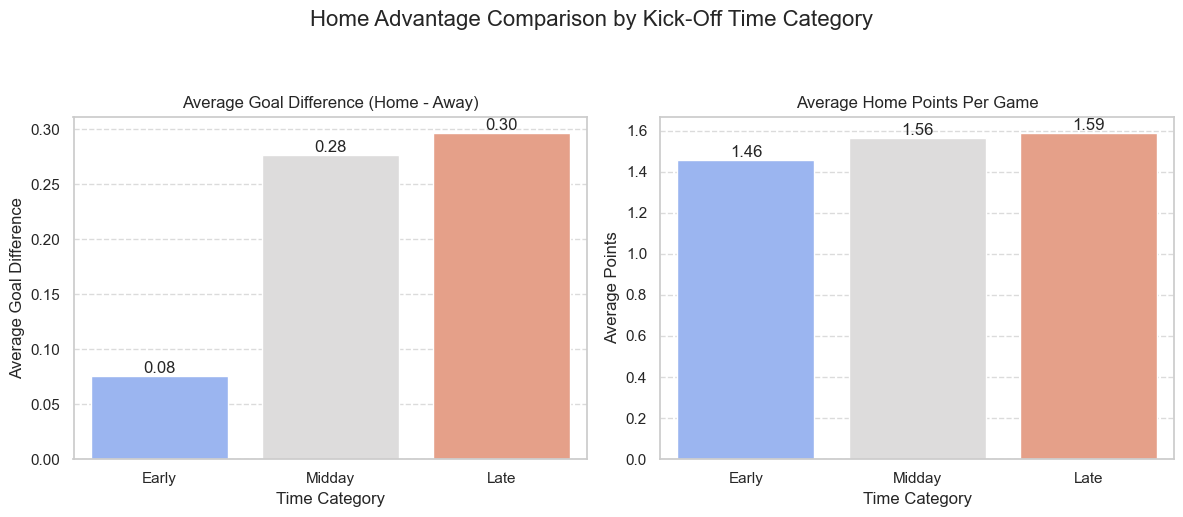

In [30]:
# Visualise Home Advantage Metrics Across Time Categories

# Check if the time_category_comparison DataFrame exists from the previous cell
if 'time_category_comparison' in locals() and time_category_comparison is not None:
    print("\nGenerating bar charts comparing metrics across time categories...")

    # Define the logical order for plotting categories
    # Filter time_order list to ensure only categories present in the data are included
    time_order = [cat for cat in ['Early', 'Midday', 'Late'] if cat in time_category_comparison['time_category'].unique()]

    if not time_order:
         print("Warning: No valid categories ('Early', 'Midday', 'Late') found in the comparison data to plot.")
    else:
        # Create the Plots
        # Create a figure and a set of subplots (1 row, 2 columns)
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        fig.suptitle('Home Advantage Comparison by Kick-Off Time Category', fontsize=16, y=1.03)

        # Plot 1: Average Goal Difference
        sns.barplot(ax=axes[0], x='time_category', y='goal_difference', data=time_category_comparison,
                    palette='coolwarm', order=time_order)
        axes[0].set_title('Average Goal Difference (Home - Away)')
        axes[0].set_xlabel('Time Category')
        axes[0].set_ylabel('Average Goal Difference')
        axes[0].grid(axis='y', linestyle='--', alpha=0.7)
        # Add exact values on bars
        for container in axes[0].containers:
            axes[0].bar_label(container, fmt='%.2f')

        # Plot 2: Average Home Points
        sns.barplot(ax=axes[1], x='time_category', y='home_points', data=time_category_comparison,
                    palette='coolwarm', order=time_order)
        axes[1].set_title('Average Home Points Per Game')
        axes[1].set_xlabel('Time Category')
        axes[1].set_ylabel('Average Points')
        axes[1].grid(axis='y', linestyle='--', alpha=0.7)
        # Add exact values on bars
        for container in axes[1].containers:
            axes[1].bar_label(container, fmt='%.2f')

        # Final Touches & Saving
        plt.tight_layout(rect=[0, 0, 1, 0.97]) # Adjust layout to prevent overlap

        # Define filename and save
        plot_filename_time_cat_comp = os.path.join(figures_dir, 'time_category_comparison_bar_charts.png')
        try:
            # Ensure the figures directory exists
            os.makedirs(figures_dir, exist_ok=True)
            plt.savefig(plot_filename_time_cat_comp, bbox_inches='tight', dpi=300)
            print(f" Time category comparison plots saved successfully to: {plot_filename_time_cat_comp}")
        except Exception as e:
            print(f" An error occurred while saving the time category comparison plots: {e}")

        # Display the Plot
        plt.show()

else:
    print("\nSkipping visualisation: 'time_category_comparison' DataFrame not found.")
    print(" Ensure the cell calculating time_category_comparison ran successfully.")

In [31]:
# Time/Day Effects Analysis: Calculate Averages by Day of Week 

# Check if match_df_merged exists and has the required columns
if ('match_df_merged' in locals() and match_df_merged is not None and
    'day_of_week' in match_df_merged.columns and
    'goal_difference' in match_df_merged.columns and
    'home_points' in match_df_merged.columns):

    print("\nCalculating average home advantage metrics per day of the week...")

    # Create a DataFrame without NaN values in the columns needed for grouping and aggregation
    valid_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    calc_df_dow = match_df_merged[
        match_df_merged['day_of_week'].isin(valid_days) &
        match_df_merged['goal_difference'].notna() &
        match_df_merged['home_points'].notna()
    ].copy()

    if not calc_df_dow.empty:
        # Group by 'day_of_week' and Calculate Means
        day_of_week_comparison = calc_df_dow.groupby('day_of_week')[[
            'goal_difference',
            'home_points'
        ]].mean().reset_index()

        # Order Days Logically
        # Define the desired order for the days
        day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        try:
            # Convert 'day_of_week' to a categorical type with the specified order
            day_of_week_comparison['day_of_week'] = pd.Categorical(
                day_of_week_comparison['day_of_week'],
                categories=day_order,
                ordered=True
            )
            # Sort the DataFrame based on the categorical order
            day_of_week_comparison = day_of_week_comparison.sort_values('day_of_week')
            print(" Ordered results by day of the week (Mon-Sun).")
        except Exception as e:
            print(f" Warning: Could not reorder days: {e}. Results might be alphabetically ordered.")

        print("\n--- Comparison of Average Metrics by Day of Week ---")
        # Display the resulting comparison table
        display(day_of_week_comparison)
        print("-" * 60)

    else:
         print(" Warning: No valid data found for day of week calculation after filtering.")
         day_of_week_comparison = None # Ensure variable exists but is None

else:
    print("\nSkipping day of week calculation: 'match_df_merged' DataFrame or required columns not found.")


Calculating average home advantage metrics per day of the week...
 Ordered results by day of the week (Mon-Sun).

--- Comparison of Average Metrics by Day of Week ---


,day_of_week,goal_difference,home_points
1,Monday,0.292308,1.561538
5,Tuesday,0.367188,1.671875
6,Wednesday,0.375000,1.610000
4,Thursday,0.246914,1.530864
0,Friday,-0.130435,1.420290
2,Saturday,0.269484,1.561502
3,Sunday,0.235585,1.542010


------------------------------------------------------------



Generating bar charts comparing metrics across days of the week...
 Day of week comparison plots saved successfully to: C:\Users\matth\OneDrive\Documents\data_science_project\premier-league-home-advantage\output\figures\day_of_week_comparison_bar_charts.png


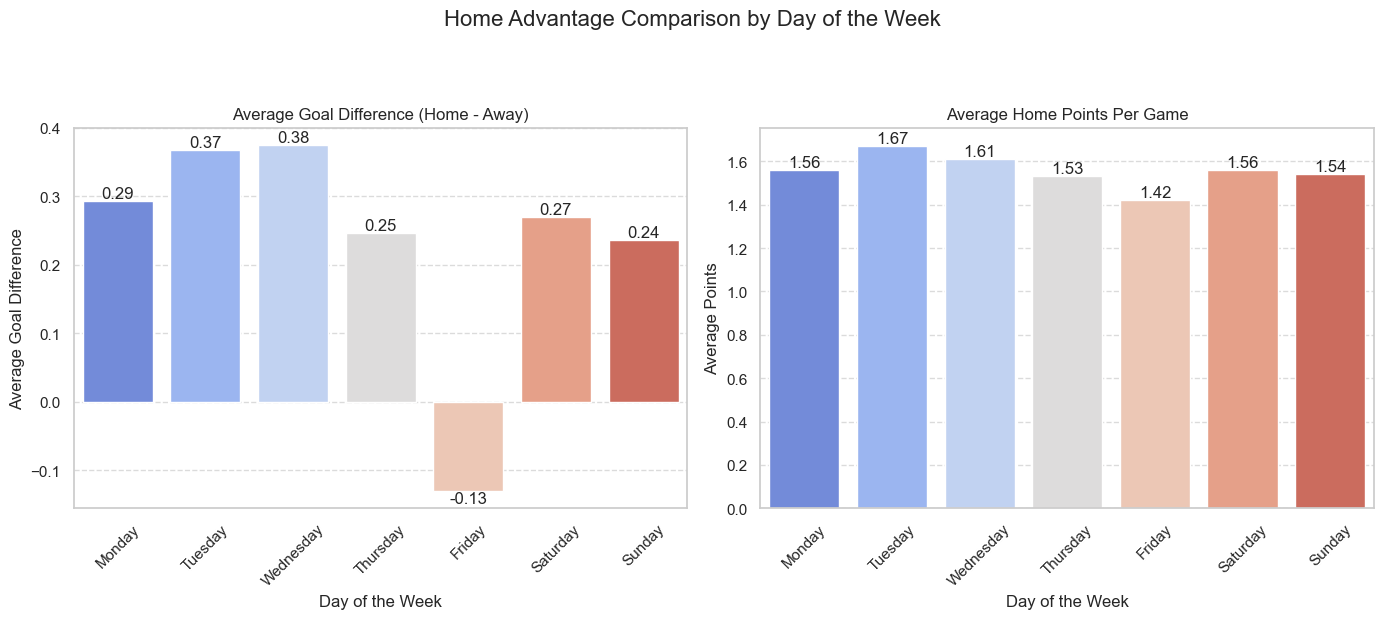

In [32]:
# Visualise Home Advantage Metrics Across Days of the Week

# Check if the day_of_week_comparison DataFrame exists from the previous cell
if 'day_of_week_comparison' in locals() and day_of_week_comparison is not None:
    print("\nGenerating bar charts comparing metrics across days of the week...")

    # Define the logical order for plotting days
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    # Check if the DataFrame is empty before proceeding
    if day_of_week_comparison.empty:
         print("Warning: The 'day_of_week_comparison' DataFrame is empty. Cannot generate plot.")
    else:
        # Create the Plots
        # Create a figure and a set of subplots (1 row, 2 columns)
        fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # Slightly wider figure for 7 days
        fig.suptitle('Home Advantage Comparison by Day of the Week', fontsize=16, y=1.03)

        # Plot 1: Average Goal Difference
        # Plot directly using day_of_week_comparison, relying on previous ordering
        sns.barplot(ax=axes[0], x='day_of_week', y='goal_difference', data=day_of_week_comparison,
                    palette='coolwarm', order=day_order)
        axes[0].set_title('Average Goal Difference (Home - Away)')
        axes[0].set_xlabel('Day of the Week')
        axes[0].set_ylabel('Average Goal Difference')
        axes[0].tick_params(axis='x', rotation=45) # Rotate x-axis labels for better readability
        axes[0].grid(axis='y', linestyle='--', alpha=0.7)
        # Add exact values on bars
        for container in axes[0].containers:
            axes[0].bar_label(container, fmt='%.2f')

        # Plot 2: Average Home Points
        # Plot directly using day_of_week_comparison, relying on previous ordering
        sns.barplot(ax=axes[1], x='day_of_week', y='home_points', data=day_of_week_comparison,
                    palette='coolwarm', order=day_order)
        axes[1].set_title('Average Home Points Per Game')
        axes[1].set_xlabel('Day of the Week')
        axes[1].set_ylabel('Average Points')
        axes[1].tick_params(axis='x', rotation=45) # Rotate x-axis labels
        axes[1].grid(axis='y', linestyle='--', alpha=0.7)
        # Add exact values on bars
        for container in axes[1].containers:
            axes[1].bar_label(container, fmt='%.2f')

        # Final Touches & Saving
        plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout

        # Define filename and save
        plot_filename_dow_comp = os.path.join(figures_dir, 'day_of_week_comparison_bar_charts.png')
        try:
            # Ensure the figures directory exists
            os.makedirs(figures_dir, exist_ok=True)
            plt.savefig(plot_filename_dow_comp, bbox_inches='tight', dpi=300)
            print(f" Day of week comparison plots saved successfully to: {plot_filename_dow_comp}")
        except Exception as e:
            print(f" An error occurred while saving the day of week comparison plots: {e}")

        # Display the Plot
        plt.show()

else:
    print("\nSkipping visualisation: 'day_of_week_comparison' DataFrame not found.")